<a href="https://colab.research.google.com/github/ShazedaOni/speech_emotion_recognition/blob/main/Copy_of_SER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [ ]:
!pip install librosa

In [ ]:
# pip install librosa
# linear algebra
import numpy as np
# data processing, CSV file I/O(e.g pd.read_CSV)
import pandas as pd
# to use operating systems dependent functionality
import os
# to extract speech features
import librosa
# read and write WAV files
import wave
# to generate the visualizations
import matplotlib.pyplot as plt

# NLP classifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline


# LSTM Classifier
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop

print("loaded libraries")

loaded libraries


In [ ]:
conda update scikit-learn

ValueError: The python kernel does not appear to be a conda environment.  Please use ``%pip install`` instead.

In [ ]:
%pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 11.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
pip install --upgrade scikit-learn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def extract_mfcc(wav_file_name):
  #This function extracts mfcc features and obtain the mean of each dimension
  #Input : path_to_wav_file
  #output: mfcc_features'''
  y, sr = librosa.load(wav_file_name)
  mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)

  return mfccs

In [ ]:
##### load radvess speech data #####
import os
def extract_mfcc(wav_file_name):
  #This function extracts mfcc features and obtain the mean of each dimension
  #Input : path_to_wav_file
  #output: mfcc_features'''
  y, sr = librosa.load(wav_file_name)
  mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)

  return mfccs
  pass
radvess_speech_labels = []  # to save extracted label/file
ravdess_speech_data = []    # to save extracted features/file

for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio'):
    for filename in filenames: #print(os.path.join(dirname, filename))
       radvess_speech_labels.append(int(filename[7:8]) - 1)  # the index 7 and 8 of the file name represent the emotion label
       wav_file_name = os.path.join(dirname, filename)
       ravdess_speech_data.append(extract_mfcc(wav_file_name))  # extract MFCC features/files
print("Finish loading the dataset")

Finish loading the dataset


In [ ]:
import librosa


In [ ]:
import numpy as np


In [ ]:
# Assuming you have a cell where you define radvess_speech_data
#ravdess_speech_data = [1.0, 2.0, 3.0, 4.0]

# Now, in a different cell or later in the same cell
ravdess_speech_data  # This should work without any error


[array([-6.4711743e+02,  6.3513783e+01,  6.0400691e+00,  1.5049635e+01,
         1.2956362e+01,  8.2202597e+00,  6.2446733e+00, -2.6909750e+00,
        -2.2044034e+00,  4.0563197e+00,  6.7914456e-01, -6.2349839e-03,
         5.6387029e+00,  1.7890096e+00, -4.9631244e-01,  4.5108405e-01,
         1.5634835e-01, -1.0800632e+00,  3.1827369e-01,  2.3332338e+00,
        -2.4909649e+00,  1.7008570e+00, -2.9470367e+00,  9.4965285e-01,
        -1.3549660e+00,  2.5824127e-01, -2.3430972e+00, -6.3837504e-01,
        -3.3007414e+00,  4.6381059e-01, -6.2562913e-01,  5.2523476e-01,
        -8.3294743e-01,  6.3879621e-01, -1.7731498e+00, -1.0632255e+00,
        -1.9634675e+00, -2.4678042e+00, -2.6598203e+00, -1.0416654e+00],
       dtype=float32),
 array([-4.8546030e+02,  3.8731350e+01, -5.7136254e+00,  4.8874779e+00,
        -5.4716140e-01,  5.1731634e+00, -4.6637878e+00, -9.0268354e+00,
        -7.2447753e+00, -2.7367823e-02, -9.0455788e-01, -6.4002790e+00,
         1.0298617e+00, -3.7416265e+00, 

In [ ]:
##### convert data and label to array #####
from keras.utils import to_categorical
ravdess_speech_data_array = np.asarray(ravdess_speech_data)  # convert the input to an array
ravdess_speech_label_array = np.array(radvess_speech_labels)
ravdess_speech_label_array.shape  # get tuple of array dimensions

##### make categorical labels
labels_categorical = to_categorical(ravdess_speech_label_array) #convert a class vector (integer) to binary class matrix
labels_categorical.shape

(2880, 8)

In [ ]:
ravdess_speech_data_array.shape

(2880, 40)

In [ ]:
print(ravdess_speech_data_array.shape)
print(labels_categorical.shape)

(2880, 40)
(2880, 8)


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming ravdess_speech_data_array and labels_categorical are defined
print(ravdess_speech_data_array.shape)
print(labels_categorical.shape)

# Now, try using train_test_split
x_train, x_test, y_train, y_test = train_test_split(np.array(ravdess_speech_data_array), labels_categorical, test_size=0.20, random_state=9)


(2880, 40)
(2880, 8)


In [ ]:
# Split the training, validation, and testing sets
number_of_samples = ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)

In [ ]:
#Define the LSTM model
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences = False, input_shape = (40,1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))

    #configures the model for training
    model.compile(loss='categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])
    return model

In [ ]:
w = np.expand_dims(ravdess_speech_data_array[:training_samples],-1)

In [ ]:
w.shape

(2304, 40, 1)

In [ ]:
### train using LSTM model
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
model_A = create_model_LSTM()
history = model_A.fit(no.expand_dims(ravdess_speech_data_array[:training_samples],-1),labels_categorical[:training_samples],validation_dat= np.expand_dims(ravdess_speech_data_array[training_samples: training_samples+validation_samples],-1),labels_categorical[training_samples:training_samples+validation_samples], epochs=130, shuffle=True)


SyntaxError: positional argument follows keyword argument (<ipython-input-38-4576597f0cb7>, line 2)

In [ ]:
from keras.layers import LSTM, Dense, Dropout
from keras.layers import Activation
model_A = create_model_LSTM()
history = model_A.fit(
    np.expand_dims(ravdess_speech_data_array[:training_samples], -1),
    labels_categorical[:training_samples],
    validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples: training_samples + validation_samples], -1),
                     labels_categorical[training_samples: training_samples + validation_samples]),
    epochs=130,
    shuffle=True
)


Epoch 1/130
72/72 [==============================] - 7s 56ms/step - loss: 2.0699 - accuracy: 0.1497 - val_loss: 2.0276 - val_accuracy: 0.1701
Epoch 2/130
72/72 [==============================] - 5s 72ms/step - loss: 2.0085 - accuracy: 0.1975 - val_loss: 1.9468 - val_accuracy: 0.2083
Epoch 3/130
72/72 [==============================] - 4s 61ms/step - loss: 1.9730 - accuracy: 0.2036 - val_loss: 1.9099 - val_accuracy: 0.2569
Epoch 4/130
72/72 [==============================] - 3s 47ms/step - loss: 1.9276 - accuracy: 0.2383 - val_loss: 1.8793 - val_accuracy: 0.2674
Epoch 5/130
72/72 [==============================] - 3s 47ms/step - loss: 1.9062 - accuracy: 0.2465 - val_loss: 1.8430 - val_accuracy: 0.2847
Epoch 6/130
72/72 [==============================] - 5s 73ms/step - loss: 1.8774 - accuracy: 0.2678 - val_loss: 1.8484 - val_accuracy: 0.2569
Epoch 7/130
72/72 [==============================] - 5s 63ms/step - loss: 1.8488 - accuracy: 0.2886 - val_loss: 1.7837 - val_accuracy: 0.2882
Epoch 

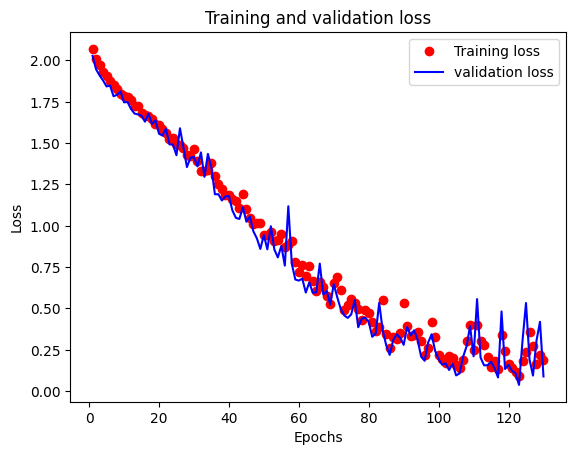

In [ ]:
### loss plots using LSTM model
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
pip install matplotlib


In [ ]:
from IPython.display import Audio

# Assuming 'radvess_audio_example' is the variable containing the audio signal
Audio(data=radvess_audio_example, rate=sampling_rate)


NameError: name 'radvess_audio_example' is not defined

In [ ]:
pip install matplotlib librosa IPython


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.0 MB/s eta 0:00:00


In [ ]:
import random
from IPython.display import Audio
# Assuming 'dataset' is a list of audio signals
random_audio = random.choice(dataset)
Audio(data=random_audio, rate=sampling_rate)


NameError: name 'dataset' is not defined

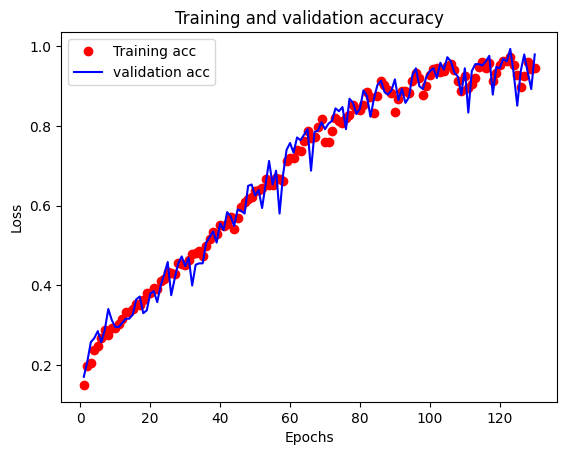

In [ ]:
### accuracy plots using LSTM model
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
### evaluation using model A
# Assuming 'model_A' is your Sequential model
evaluation_results = model_A.evaluate(
    np.expand_dims(ravdess_speech_data_array[training_samples + validation_samples:], -1),
    labels_categorical[training_samples + validation_samples:]
)

# Print the evaluation results
print("Loss:", evaluation_results[0])
print("Accuracy:", evaluation_results[1])


9/9 [==============================] - 0s 18ms/step - loss: 0.0537 - accuracy: 0.9861
Loss: 0.05369564890861511
Accuracy: 0.9861111044883728


In [ ]:
emotions= {1: 'neural', 2: 'calm', 3: 'happy', 4: 'angry', 5: 'fearful', 6: 'sad', 7: 'disgust', 8: 'surprised'}
def predict(wav_filepath):
   test_point= extract_mfcc(wav_filepath)
   test_point= np.reshape(test_point, newshape=(1,40,1))
   predictions = model_A.predict(test_point)
   print(emotions[np.argmax(predictions[0])+1])

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-01-01-01-01-02.wav')


1/1 [==============================] - 0s 488ms/step
neural


In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-03-01-01-01-02.wav')


1/1 [==============================] - 0s 66ms/step
happy


In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-08-01-01-01-02.wav')

1/1 [==============================] - 0s 32ms/step
surprised


In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/audio_speech_actors_01-24/Actor_22/03-01-01-01-01-01-22.wav')

1/1 [==============================] - 0s 104ms/step
neural


In [ ]:
model_A.save('mymodel.hs')

In [ ]:
import tensorflow as tf

# Load your Keras model
model = tf.keras.models.load_model('mymodel.hs')


In [ ]:
pip install tensorflow


In [ ]:
'%cd/content/drive/MyDrive/Colab Notebooks/SER.ipynb'

'%cd/content/drive/MyDrive/Colab Notebooks/SER.ipynb'

In [ ]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [ ]:
!git add .
!git commit -m "Initial commit"


error: open("drive/MyDrive/01 Introduction B2 (1).gdoc"): Operation not supported
error: unable to index file 'drive/MyDrive/01 Introduction B2 (1).gdoc'
fatal: adding files failed
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@0e23e71b1934.(none)')


In [ ]:
!git remote add origin https://github.com/ShazedaOni/SER.git


In [ ]:
!git push -u origin master


error: src refspec master does not match any
error: failed to push some refs to 'https://github.com/ShazedaOni/SER.git'


In [ ]:
echo "# SER-project" >> README.md

SyntaxError: invalid syntax (<ipython-input-1-075f6c8ee4e0>, line 1)